In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class Model(nn.Module):
    # input layer -> 4 variables
    # hidden layer 1-n
    # output -> classify between 3 different possible output

    def __init__(self, in_vars=4, h1=8, h2=8, out_vars=3):
        super().__init__()
        # fully connected layer 1
        self.fc1 = nn.Linear(in_vars, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_vars)

    def forward(self, x):
        # if < return 0
        # else gives the val
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [63]:
torch.manual_seed(41)

model = Model()

In [64]:
import matplotlib as plt
%matplotlib inline
import pandas as pd

In [65]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [66]:
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

/tmp/ipykernel_2404/986955548.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [67]:
X = df.drop('variety', axis=1)
y = df['variety']

X = X.values
y = y.values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [70]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [71]:
# set criterion to measure error
criterion = nn.CrossEntropyLoss()

# Adam Optimizer
# params = all the layers
# epoch = iteration -> sending data through the nn once
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [72]:
# training
epochs = 200
losses = []

for i in range(epochs):
    # send data forward
    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)

    losses.append(loss.detach().numpy())

    if i % 10 == 0: print(f'epoch: {i} and loss: {loss}')

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 and loss: 1.1318365335464478
epoch: 10 and loss: 0.9658561944961548
epoch: 20 and loss: 0.6789938807487488
epoch: 30 and loss: 0.4004894495010376
epoch: 40 and loss: 0.22509503364562988
epoch: 50 and loss: 0.12207334488630295
epoch: 60 and loss: 0.07481689006090164
epoch: 70 and loss: 0.054512783885002136
epoch: 80 and loss: 0.04437492415308952
epoch: 90 and loss: 0.03837944194674492
epoch: 100 and loss: 0.03434774652123451
epoch: 110 and loss: 0.031376756727695465
epoch: 120 and loss: 0.029055016115307808
epoch: 130 and loss: 0.027161767706274986
epoch: 140 and loss: 0.025570696219801903
epoch: 150 and loss: 0.024206869304180145
epoch: 160 and loss: 0.02301429770886898
epoch: 170 and loss: 0.021955013275146484
epoch: 180 and loss: 0.02100125141441822
epoch: 190 and loss: 0.02013765648007393


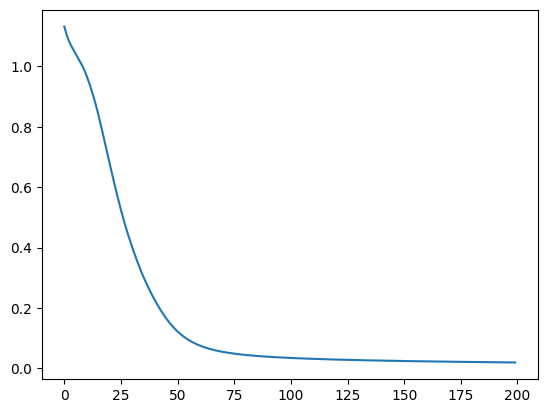

In [73]:
plt.pyplot.plot(range(epochs), losses)